In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
print(tf.__version__)



2.13.0


## Data Preprocessing

### Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory('train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


2024-09-23 13:23:08.769018: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Validation Image Preprocessing 

In [5]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    print(x)
    print(y)
    break

tf.Tensor(
[[[[141.   144.   149.  ]
   [139.   142.   147.  ]
   [140.5  143.5  148.5 ]
   ...
   [123.5  122.5  128.5 ]
   [121.5  120.5  126.5 ]
   [122.75 121.75 127.75]]

  [[146.5  149.5  154.5 ]
   [140.5  143.5  148.5 ]
   [138.75 141.75 146.75]
   ...
   [122.25 121.25 127.25]
   [124.75 123.75 129.75]
   [126.   125.   131.  ]]

  [[138.75 141.75 146.75]
   [136.75 139.75 144.75]
   [138.5  141.5  146.5 ]
   ...
   [126.5  125.5  131.5 ]
   [125.75 124.75 130.75]
   [124.5  123.5  129.5 ]]

  ...

  [[102.5  102.5  102.5 ]
   [107.5  107.5  107.5 ]
   [105.5  105.5  105.5 ]
   ...
   [100.25  98.25  99.25]
   [ 99.25  97.25  98.25]
   [100.75  98.75  99.75]]

  [[108.25 108.25 108.25]
   [ 98.75  98.75  98.75]
   [103.75 103.75 103.75]
   ...
   [ 99.75  97.75  98.75]
   [100.5   98.5   99.5 ]
   [103.   101.   102.  ]]

  [[112.   112.   112.  ]
   [107.25 107.25 107.25]
   [103.75 103.75 103.75]
   ...
   [107.5  105.5  106.5 ]
   [106.25 104.25 105.25]
   [103.25 101.25 10

### Building Model 

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()

### Building Convolution Layer 

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Dropout(0.25)) # To avoid overfitting I am doing this

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1500,activation='relu'))

In [18]:
model.add(Dropout(0.4))

# Output Layer

In [19]:
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [20]:
model.compile(optimizer= tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

### Training Model

In [22]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 2102s 957ms/step - loss: 1.3313 - accuracy: 0.6065 - val_loss: 0.5345 - val_accuracy: 0.8341
Epoch 2/10
2197/2197 [==============================] - 1971s 897ms/step - loss: 0.4368 - accuracy: 0.8615 - val_loss: 0.3402 - val_accuracy: 0.8939
Epoch 3/10
2197/2197 [==============================] - 1933s 880ms/step - loss: 0.2643 - accuracy: 0.9146 - val_loss: 0.2295 - val_accuracy: 0.9276
Epoch 4/10
2197/2197 [==============================] - 1937s 882ms/step - loss: 0.1837 - accuracy: 0.9412 - val_loss: 0.1590 - val_accuracy: 0.9491
Epoch 5/10
2197/2197 [==============================] - 1961s 893ms/step - loss: 0.1357 - accuracy: 0.9560 - val_loss: 0.1494 - val_accuracy: 0.9523
Epoch 6/10
2197/2197 [==============================] - 1914s 871ms/step - loss: 0.1043 - accuracy: 0.9660 - val_loss: 0.1201 - val_accuracy: 0.9634
Epoch 7/10
2197/2197 [==============================] - 1908s 868ms/step - loss: 0.0855 - accuracy: 0.9725

# Model Evaluation

In [23]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 570s 259ms/step - loss: 0.0216 - accuracy: 0.9931


In [24]:
print(train_loss,train_acc)

0.02160702645778656 0.9930578470230103


In [25]:
#Model on Validation Set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 138s 251ms/step - loss: 0.1074 - accuracy: 0.9703


In [26]:
print(val_loss,val_acc)

0.10740891844034195 0.9702936410903931


# Saving Model

In [56]:
model.save("trained_model.keras")

In [28]:
training_history.history

{'loss': [1.3313298225402832,
  0.4367833137512207,
  0.264282763004303,
  0.18374191224575043,
  0.1357373595237732,
  0.10433142632246017,
  0.08552461862564087,
  0.07871309667825699,
  0.06328780949115753,
  0.05663583427667618],
 'accuracy': [0.6064727306365967,
  0.8614553213119507,
  0.9145885109901428,
  0.94121915102005,
  0.9559712409973145,
  0.9660431146621704,
  0.9724588990211487,
  0.9744647741317749,
  0.9794152975082397,
  0.9816629886627197],
 'val_loss': [0.5345107913017273,
  0.3402155041694641,
  0.22951418161392212,
  0.15902696549892426,
  0.149388387799263,
  0.12008891254663467,
  0.1358059048652649,
  0.1259388029575348,
  0.12369528412818909,
  0.10740897059440613],
 'val_accuracy': [0.834054172039032,
  0.8939221501350403,
  0.9276121258735657,
  0.949066698551178,
  0.9522535800933838,
  0.963350772857666,
  0.960050106048584,
  0.9613589644432068,
  0.9644320607185364,
  0.9702936410903931]}

In [29]:
#Recording History in JSON
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [30]:
training_history.history['val_accuracy']

[0.834054172039032,
 0.8939221501350403,
 0.9276121258735657,
 0.949066698551178,
 0.9522535800933838,
 0.963350772857666,
 0.960050106048584,
 0.9613589644432068,
 0.9644320607185364,
 0.9702936410903931]

### Accuracy Visualization 

In [32]:
training_history.history['accuracy']

[0.6064727306365967,
 0.8614553213119507,
 0.9145885109901428,
 0.94121915102005,
 0.9559712409973145,
 0.9660431146621704,
 0.9724588990211487,
 0.9744647741317749,
 0.9794152975082397,
 0.9816629886627197]

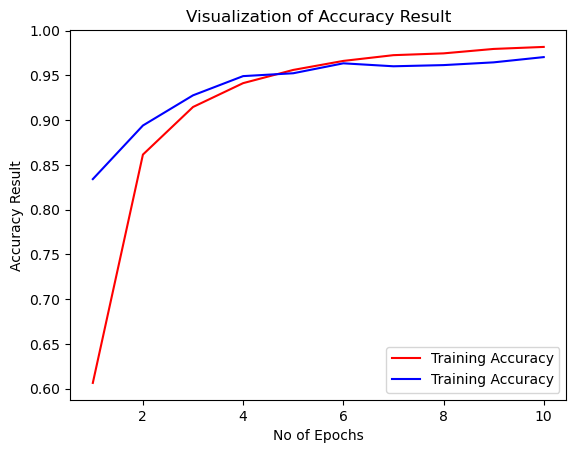

In [33]:
epochs= [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Training Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other Metrics for Model Evaluation

In [34]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [36]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred= model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 140s 255ms/step


(array([[9.9998319e-01, 4.3953914e-06, 8.5278998e-08, ..., 5.4283709e-12,
         8.9545191e-11, 1.8202622e-11],
        [9.9999917e-01, 6.7236647e-07, 1.8535700e-09, ..., 2.6064432e-14,
         9.7504871e-13, 2.2556683e-13],
        [9.9999952e-01, 6.7372552e-09, 1.2184268e-08, ..., 3.2353116e-15,
         2.2644784e-11, 6.3730158e-12],
        ...,
        [4.1176899e-11, 1.6705132e-13, 3.6912606e-09, ..., 5.4197303e-11,
         7.9237112e-12, 9.9999952e-01],
        [3.4936705e-13, 8.6007985e-16, 5.0198956e-11, ..., 1.6024205e-12,
         1.2414844e-13, 1.0000000e+00],
        [1.1709484e-12, 8.8474299e-14, 8.5453901e-11, ..., 2.0740861e-12,
         5.3207921e-10, 9.9983621e-01]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [40]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

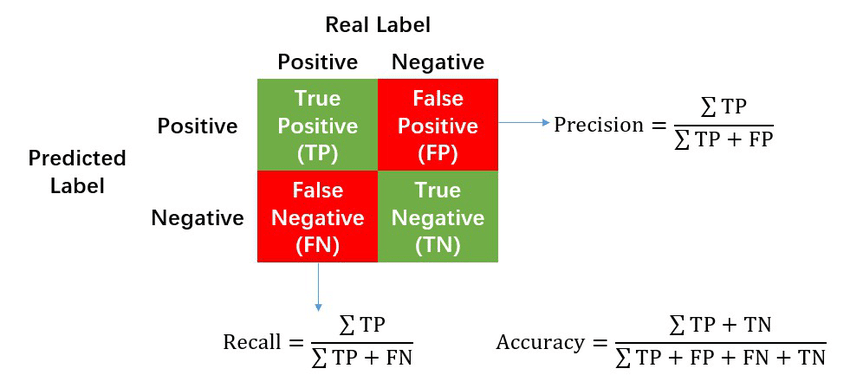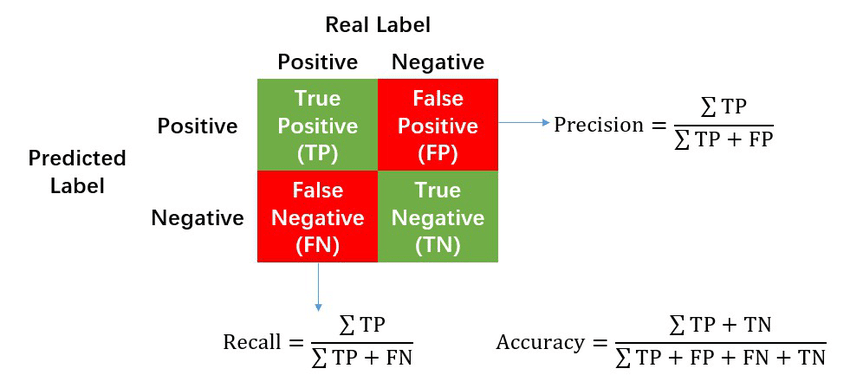

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.92      0.96       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       440
                                   Apple___healthy       0.98      0.92      0.95       502
                               Blueberry___healthy       0.96      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.88      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.98      0.

In [46]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[466,  12,   0, ...,   0,   0,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  0,   0, 435, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 488,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   0, ...,   0,   0, 459]])

### Confusion Matrix Visualization

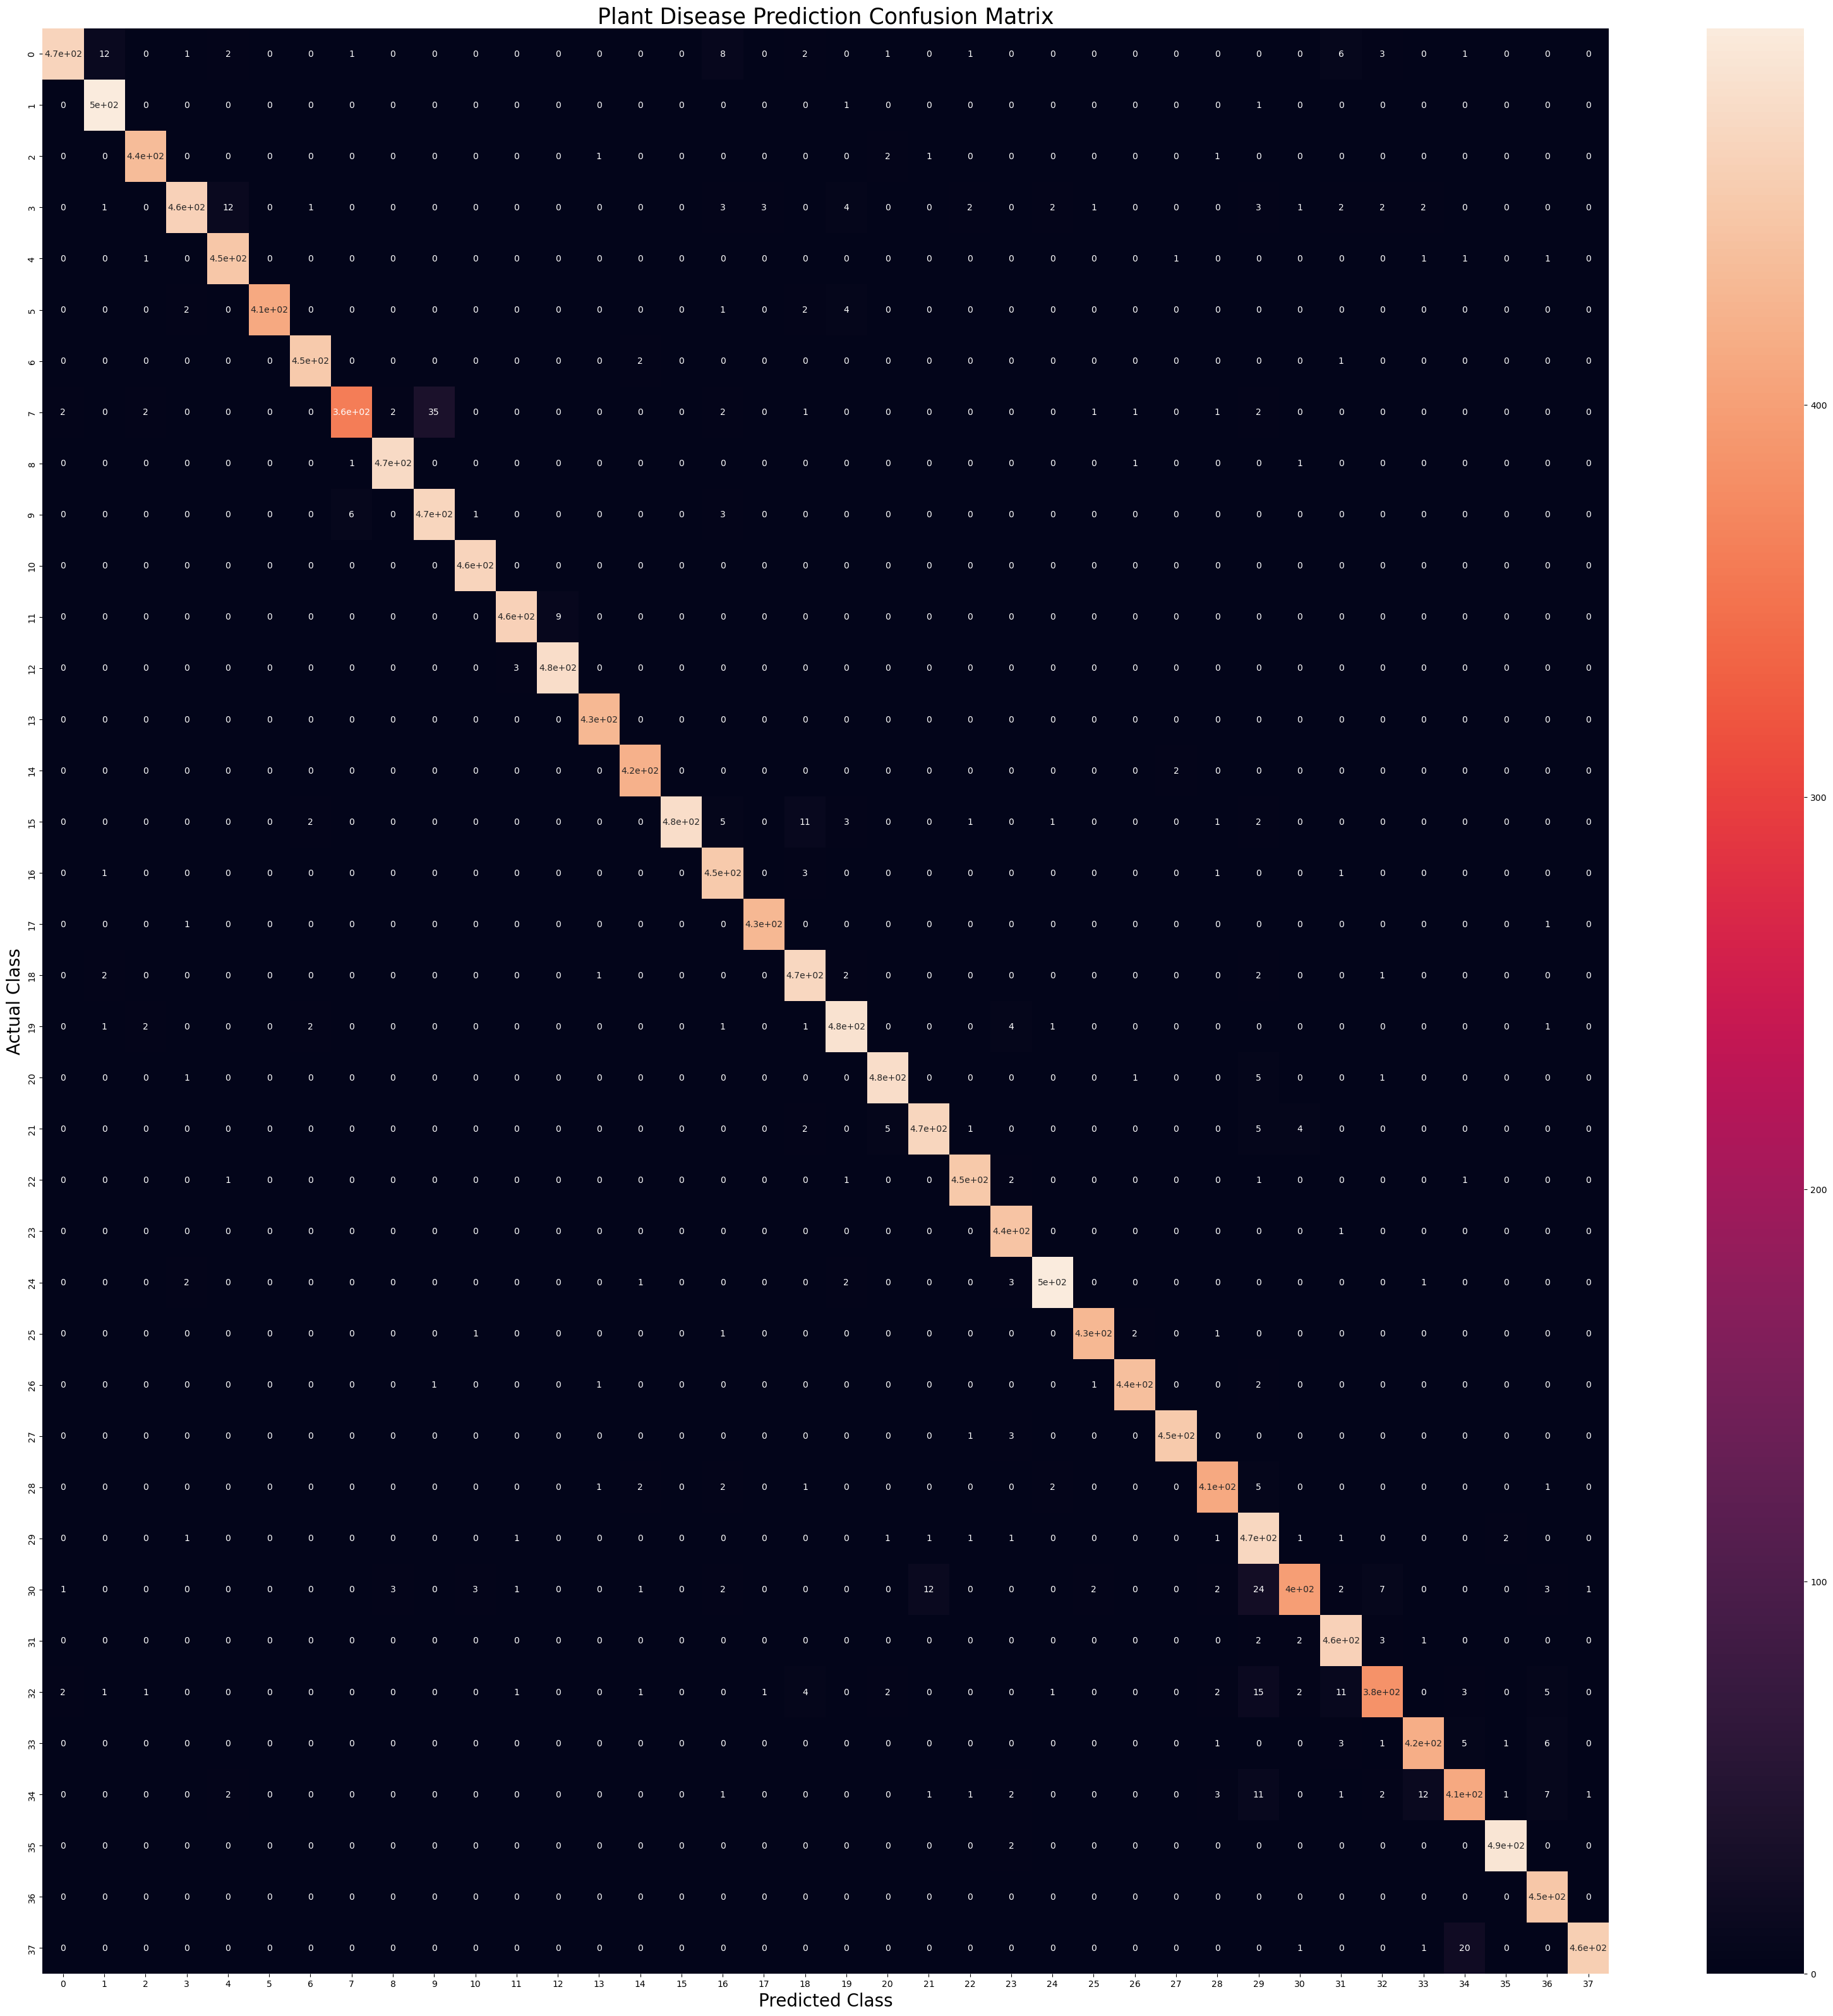

In [53]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()